# MATH 472 Homework 4
## Rachel Singleton
## Due 02/13/2020

## Problem 2.5

There were 46 crude oil spills of at least 1000 barrels from tankers in the US waters during 1974-1999. The website for this book contains the following data: the number of spills in the $i^{th}$ year, $N_i$; the estimated amount of oil shipped through US waters as part of US import/export operations in the $i^{th}$ year, adjusted for spillage in international or foreign waters, $b_{i1}$; and the amount of oil shipped through US waters during domestic shipments in the $i^{th}$ year, $b_{i2}$. The data are adapted. Oil shipment amounts are measured in billions of barrels (Bbbl).

The volume of oil shipped is a measure of exposure to spill risk. Suppose we use the Poisson process assumption given by $N_i|b_{i1}, b_{i2} ~ Poisson(\lambda_i)$, where $\lambda_i = \alpha_1 b_{i1} + \alpha_2 b_{i2}$. The parameters of this model are $\alpha_1$ and $\alpha_2$, which represent the rate of spill occurrence per Bbbl oil shipped during import/export and domestic shipments, respectively.

### (a) Derive the Newton-Raphson update for finding the MLEs of $\alpha_{1}$ and $\alpha_{2}$

### Answer to part (a)

We know our general Poisson distribution is $f(x) = \frac{\lambda^x}{x!}*e^{-\lambda}$. For our problem, $N_i$ will take the place of $x$ and we will rewrite $\lambda_i$ in vector notation. We can rewrite $[\alpha_1 \alpha_2]^T$ as $[\alpha]^T$ which then allows us to write $\lambda = \alpha^Tb$. 

This gives us a likelihood function of $L(\alpha) = \prod_{i=1}^{n} \frac{1}{N_i!}*(\alpha^Tb_i)^{N_i}*e^{-\alpha^Tb_i}$. 

We can take the log of the likelihood to get the log-likelihood function: $l(\alpha) = \log{L(\alpha)} = \sum_{i=1}^{n} \log{[\frac{1}{N_i!}*(\alpha^Tb_i)^{N_i}*e^{-\alpha^Tb_i}]}$. Now we can simplify it to get

$l(\alpha) = \sum_{i=1}^{n} N_i*\log{(\alpha^Tb_i)} - \sum_{i=1}^{n} \log{(N_i!)} - \sum_{i=1}^{n} \alpha^Tb_i$

Now we will take the derivative of our log-likelihood function:

$l^{'}(\alpha) = \sum_{i=1}^{n} N_i*\frac{b_i}{\alpha^Tb_i} - \sum_{i=1}^{n} b_i$

Lastly, we will take the derivative again to get the 2nd derivative of our log-likelihood function:

$l^{''}(\alpha) = \sum_{i=1}^{n} \frac{-N_i}{(\alpha^Tb_i)^2}*(b_i)^2$

Since $b_i$ is a vector, we can't technically square it so we will rewrite it with a transpose:

$l^{''}(\alpha) = \sum_{i=1}^{n} \frac{-N_i}{(\alpha^Tb_i)^2}*(b_ib_i^T)$

To get the Newton-Raphson update equation, we will plug our $\alpha$ vector and our derivatives of log-likelihood into equation (2.33) from the book:

$\alpha^{(t+1)} = \alpha^{(t)} - [\sum_{i=1}^{n} \frac{-N_i}{((\alpha^{(t)})^Tb_i)^2}*(b_ib_i^T)]^{-1}[\sum_{i=1}^{n} N_i*\frac{b_i}{(\alpha^{(t)})^Tb_i} - \sum_{i=1}^{n} b_i]$

### (b) Derive the Fisher scoring update for finding the MLEs of $\alpha_1$ and $\alpha_2$

### Answer to part (b)

To find the Fisher Scoring update, we will use equation (2.34) from the book, equations from part (a), and the definition of the Fisher Information matrix which is $I(\theta) = -E\{l^{''}(\theta)\}$.

We will first find the Fisher Information matrix:

$I(\alpha) = -E[\sum_{i=1}^{n} \frac{-N_i}{(\alpha^Tb_i)^2}*(b_ib_i^T)] = -\sum_{i=1}^{n} E[\frac{-N_i}{(\alpha^Tb_i)^2}*(b_ib_i^T)] = -\sum_{i=1}^{n} \frac{-b_ib_i^T}{(\alpha^Tb_i)^2}*E[N_i]$

From knowing that $N_i$ is from a Poisson distribution, we know that the expected value of $N_i$ is $\lambda_i$ which we know is equal to $\alpha^Tb_i$. This then gives us

$I(\alpha) = -\sum_{i=1}^{n} \frac{-b_ib_i^T}{(\alpha^Tb_i)^2}*(\alpha^Tb_i) = -\sum_{i=1}^{n} \frac{-b_ib_i^T}{(\alpha^Tb_i)} = \sum_{i=1}^{n} \frac{b_ib_i^T}{(\alpha^Tb_i)}$

Now we can plug the Fisher Information matrix into our updating equation:

$\alpha^{(t+1)} = \alpha^{(t)} + [\sum_{i=1}^{n} \frac{b_ib_i^T}{(\alpha^{(t)})^Tb_i}]^{-1}*[\sum_{i=1}^{n} N_i*\frac{b_i}{(\alpha^{(t)})^Tb_i} - \sum_{i=1}^{n} b_i]$

### (c) Implement the Newton-Raphson and Fisher scoring methods for this problem, provide the MLEs of $\alpha_1$ and $\alpha_2$, and compare the implementation ease and performance of the two methods.

In [1]:
import pandas as pd
import numpy as np
from scipy.linalg import inv
from math import sqrt

data = pd.read_csv("oilspills.dat", delimiter=" ")
N = data['spills'].to_numpy().reshape((26,1))
b1 = data['importexport'].to_numpy().reshape((26,1))
b2 = data['domestic'].to_numpy().reshape((26,1))

n = N.size
b = np.hstack((b1,b2)).reshape((26,2))
alpha = np.asarray([0.5,0.5]).reshape((2,1))

appendedList = []

def likelihood(alpha):
    total = []
    for i in range(26):
        b_i = b[i].reshape((2,1))
        total.append(N[i]*np.log(alpha.T.dot(b_i)) - np.log(np.math.factorial(N[i])) - (alpha.T.dot(b_i)))
    total = np.asarray(total)
    summation = total.sum(axis=0)
    return summation

def lprime(alpha):
    total = []
    for i in range(26):
        b_i = b[i].reshape((2,1))
        total.append(((N[i]/((alpha.T).dot(b_i)))*b_i)-b_i)
    total = np.asarray(total)
    summation = total.sum(axis=0)
    return summation

def lprime_2(alpha):
    total = []
    for i in range(n):
        b_i = b[i].reshape((2,1))
        total.append((-N[i]/((alpha.T).dot(b_i)**2))*(b_i.dot(b_i.T)))
    total = np.asarray(total)
    summation = total.sum(axis=0)
    return summation

def fisher(alpha):
    total = []
    for i in range(n):
        b_i = b[i].reshape((2,1))
        total.append((1/(alpha.T.dot(b_i)))*(b_i.dot(b_i.T)))
    total = np.asarray(total)
    summation = total.sum(axis=0)
    return summation

x_newton = []
y_newton = []

def newton_method(alpha,param):
    alpha_values = [alpha]
    num_iterations = 0
    max_iterations = 7
    data_values = []
    
    x_newton.append(alpha_values[num_iterations][0])
    y_newton.append(alpha_values[num_iterations][1])
    
    while((num_iterations < max_iterations)):
        alpha = alpha - inv(lprime_2(alpha)).dot(lprime(alpha).reshape((2,1)))
        data_values = [num_iterations,alpha]
        alpha_values.append(alpha)
        appendedList.append(data_values)
        num_iterations+=1
        x_newton.append(alpha_values[num_iterations][0])
        y_newton.append(alpha_values[num_iterations][1])
    
    # Printing results
    if(param==1):
        if(num_iterations == max_iterations):
            print("You reached the maximum number of iterations.")
        else:
            print("Number of iterations: ",num_iterations)
        print("Final Solution: ", alpha_values)
    elif(param==2):
        return alpha_values

newton_method(alpha,2)
   
print("Table for Starting Alphas [0.5,0.5] Using Newton's Method")
df = pd.DataFrame(appendedList, columns = ['Iteration,t','Alphas'])
df = df.iloc[2:7,:]
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Table for Starting Alphas [0.5,0.5] Using Newton's Method


"Iteration,t",Alphas
2,[[1.08904959] [0.9364765 ]]
3,[[1.09709646] [0.93756821]]
4,[[1.09715253] [0.93755459]]
5,[[1.09715253] [0.93755458]]
6,[[1.09715253] [0.93755458]]


In [2]:
appendedList1 = []
fisher_error = []
x_fisher = []
y_fisher = []

def fisher_method(alpha,param):
    alpha_values = [alpha]
    num_iterations = 0
    max_iterations = 15
    data_values1 = []
    
    x_fisher.append(alpha_values[num_iterations][0])
    y_fisher.append(alpha_values[num_iterations][1])
    
    while((num_iterations < max_iterations)):
        alpha = alpha + inv(fisher(alpha)).dot(lprime(alpha).reshape((2,1)))
        fisher_error.append(inv(fisher(alpha)))
        data_values1 = [num_iterations,alpha]
        alpha_values.append(alpha)
        appendedList1.append(data_values1)
        num_iterations+=1
        x_fisher.append(alpha_values[num_iterations][0])
        y_fisher.append(alpha_values[num_iterations][1])
    
    # Printing results
    if(param==1):
        if(num_iterations == max_iterations):
            print("You reached the maximum number of iterations.")
        else:
            print("Number of iterations: ",num_iterations)
        print("Final Solution: ", alpha_values)
    elif(param==2):
        return alpha_values
    
fisher_method(alpha,2)
print("Table for Starting Alphas [0.5,0.5] Using Fisher Scoring")
df = pd.DataFrame(appendedList1, columns = ['Iteration,t','Alphas'])
df = df.iloc[10:15,:]
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Table for Starting Alphas [0.5,0.5] Using Fisher Scoring


"Iteration,t",Alphas
10,[[1.09715273] [0.93755428]]
11,[[1.09715247] [0.93755468]]
12,[[1.09715255] [0.93755455]]
13,[[1.09715253] [0.93755459]]
14,[[1.09715253] [0.93755458]]


### Answer to part (c)

Between Newton's Method and Fisher Scoring, Newton's was more efficient because it converged in 4 iterations while Fisher converged in 13 iterations. This means that Newton's outperforms Fisher and reduces the amount of time you would have to run the algorithm to find your answer. I thought that Fisher Scoring was easier to implement but that was because I had already gone through the Newton implementation and they are practically the same. In terms of "first glance" implementation, I would say that Newton's method is easier to implement because you don't have to do the expected value of the Hessian like you do with Fisher. 

### (d) Estimate standard errors for the MLEs of $\alpha_1$ and $\alpha_2$

In [3]:
diags = []
values = []
list = []
x_error = []
y_error = []

for i in range(len(fisher_error)):
    val = np.diag(fisher_error[i])
    val = [sqrt(val[0]),sqrt(val[1])]
    x_error.append(val[0])
    y_error.append(val[1])
    diags.append(val)
    values = [i,val]
    list.append(values)

print("Table for Errors for Alphas [0.5,0.5]")
df = pd.DataFrame(list, columns = ['Iteration,t','Error of Alpha'])
df = df.iloc[10:15,:]
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Table for Errors for Alphas [0.5,0.5]


"Iteration,t",Error of Alpha
10,"[0.43755598263643175, 0.6314686971816681]"
11,"[0.43755596869791896, 0.6314687109144207]"
12,"[0.43755597309782224, 0.6314687065794696]"
13,"[0.43755597170892563, 0.6314687079478624]"
14,"[0.43755597214735215, 0.6314687075159088]"


### (e) Apply the method of steepest ascent. Use step-halving backtracking as necessary.

In [4]:
values = []
list = []
x_ascent = []
y_ascent = []

def ascent_method(init_alpha):
    step = 1
    num_iterations = 0
    max_iterations = 77
    alpha_new = alpha + step*lprime(init_alpha)
    alpha_list = np.hstack([init_alpha,alpha_new])
    x_ascent.append(alpha_list[0][num_iterations])
    x_ascent.append(alpha_list[0][num_iterations+1])
    y_ascent.append(alpha_list[1][num_iterations])
    y_ascent.append(alpha_list[1][num_iterations+1])
    alpha_old = init_alpha
    check1 = alpha_new[0]-alpha_old[0]
    check2 = alpha_new[1]-alpha_old[1]
    check = np.linalg.norm([check1,check2],axis=0)
    
    while(num_iterations < max_iterations) & (check > 1e-6):
        alpha_old = np.array([alpha_list[:, -1]]).T
        alpha_new = alpha_old + step*lprime(alpha_old)
        g_old = likelihood(alpha_old)
        g_new = likelihood(alpha_new)
        if((g_new > g_old) & (np.isfinite(g_new))):
            alpha_list = np.hstack((alpha_list, alpha_new))
            check1 = alpha_new[0]-alpha_old[0]
            check2 = alpha_new[1]-alpha_old[1]
            check = np.linalg.norm([check1,check2],axis=0)
            values = [num_iterations+2, alpha_list[:,-1]]
            list.append(values)
            num_iterations += 1
            x_ascent.append(alpha_list[0][num_iterations])
            y_ascent.append(alpha_list[1][num_iterations])
        else:
            step = step/2
alpha = np.asarray([1,1]).reshape((2,1))
ascent_method(alpha)

print("Table of Alphas [1,1] for Steepest Ascent")
df = pd.DataFrame(list, columns = ['Iteration,t','Alphas'])
df = df.iloc[68:74,:]
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Table of Alphas [1,1] for Steepest Ascent


/Users/Rachel/VIP_Stuff/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log


"Iteration,t",Alphas
70,[1.09754099 0.93694631]
71,[1.09751174 0.93699211]
72,[1.09748468 0.93703447]
73,[1.09745967 0.93707364]
74,[1.09743654 0.93710985]
75,[1.09741515 0.93714334]


### (f) Apply quasi-Newton optimization with the Hessian approximation update given in (2.49). Compare performance with and without step-halving.

In [5]:
alpha = np.asarray([0.5,0.5]).reshape((2,1))
alphaold = np.asarray((0.5, 0.5)).reshape((2,1))
alphanew = np.asarray((2,3)).reshape((2,1))
M = -fisher(alphaold)
values = []
listt = []
x_quasi = []
y_quasi = []

def quasi_newton(alpha0,alpha1,M):
    num_iterations = 0
    max_iterations = 50
    alpha_updates = [alpha0,alpha1]
    x_quasi.append(alpha_updates[num_iterations][0])
    y_quasi.append(alpha_updates[num_iterations][1])
    x_quasi.append(alpha_updates[num_iterations+1][0])
    y_quasi.append(alpha_updates[num_iterations+1][1])
    
    while(num_iterations < max_iterations):
        z = alpha1-alpha0
        y = lprime(alpha1)-lprime(alpha0)
        v = y - M.dot(z)
        c = 1/(v.T.dot(z))
        if((c > 0) | ((v.T.dot(z)) == 0)):
            M = M
        else:
            M = M + c*(v.dot(v.T))

        temp = alpha1
        alpha1 = alpha0 - inv(M).dot(lprime(alpha0))
        alpha_updates.append(alpha1)
        alpha0 = temp
        values = [num_iterations+2, alpha_updates[num_iterations+2]]
        listt.append(values)
        num_iterations += 1
        x_quasi.append(alpha_updates[num_iterations][0])
        y_quasi.append(alpha_updates[num_iterations][1])

quasi_newton(alphaold,alphanew,M)

print("Table of Alphas [0.5,0.5],[2,3] for Quasi-Newton")
df = pd.DataFrame(listt, columns = ['Iteration,t','Alphas'])
df = df.iloc[45:51,:]
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Table of Alphas [0.5,0.5],[2,3] for Quasi-Newton


"Iteration,t",Alphas
47,[[1.09715646] [0.93755652]]
48,[[1.09715253] [0.93755458]]
49,[[1.09715457] [0.93755559]]
50,[[1.09715253] [0.93755458]]
51,[[1.09715358] [0.9375551 ]]


### Answer to part (f)

The normal Quasi-Newton method, without backtracking, is much faster than the Quasi-Newton method with backtracking should be. With backtracking, it's possible that you may spend many more iterations fixing your c value before moving forward while with the normal Quasi-Newton method, you have a set amount of iterations that you go through and no more and no less. 

### (g) Construct a graph resemling Figure 2.8 that compares the paths taken by method used in (a)-(f). Choose the plotting region and starting point to best illustrate the features of the algorithms' performance.

/Users/Rachel/VIP_Stuff/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/Users/Rachel/VIP_Stuff/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


Text(0,10,'Quasi-Newton')

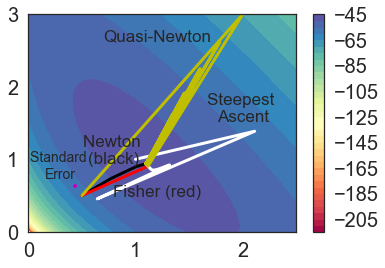

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

alpha_0 = np.linspace(0, 2.5, 100)
alpha_1 = np.linspace(0, 3, 100)

# make a meshgrid
a_0, a_1 = np.meshgrid(alpha_0, alpha_1)

Zmesh = np.zeros((a_0.shape[0],a_1.shape[0]))

alpha = np.asarray([0.5,0.5]).reshape((2,1))

def likeli(N,b,alpha_1,alpha_2):
    total = []
    alpha = np.array([alpha_1,alpha_2]).reshape(2,1)
    for i in range(26):
        b_i = b[i].reshape((2,1))
        total.append(N[i]*np.log(alpha.T.dot(b_i)) - np.log(np.math.factorial(N[i])) - (alpha.T.dot(b_i)))
    total = np.asarray(total)
    summation = total.sum(axis=0)
    return summation

for i in range(a_0.shape[0]):
    for j in range(a_1.shape[0]):
        a0 = a_0[i,j]; a1 = a_1[i,j]
        Zmesh[i,j]=likeli(N,b,a0,a1)


plt.contourf(a_0,a_1,Zmesh, 40, cmap='Spectral')
plt.colorbar()
plt.plot(x_newton,y_newton,'k-')
plt.plot(x_fisher,y_fisher,'r-')
plt.plot(x_error,y_error,'m-')
plt.plot(x_ascent,y_ascent,'w-')
plt.plot(x_quasi,y_quasi,'y-')
plt.annotate('Newton \n(black)', (0.8,0.8),textcoords="offset points", xytext=(0,10), ha='center',fontsize=17)
plt.annotate('Fisher (red)', (1.2,0.35),textcoords="offset points", xytext=(0,10), ha='center',fontsize=17)
plt.annotate('Standard \nError', (0.3,0.6),textcoords="offset points", xytext=(0,10), ha='center',fontsize=14)
plt.annotate('Steepest \nAscent', (2,1.38),textcoords="offset points", xytext=(0,10), ha='center',fontsize=17)
plt.annotate('Quasi-Newton', (1.2,2.5),textcoords="offset points", xytext=(0,10), ha='center',fontsize=17)